In [45]:
import numpy as np 

# 3x3 matrix full of zeros 
small_maze = np.zeros((3,3))

# coordinate of the cells occupied by blocks 
blocks = [(1,1), (2,1), (2,2)]


for block in blocks:
    # set the value of block-occupied cells to be equal to 1 
    small_maze[block]= 1

small_maze

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 1.]])

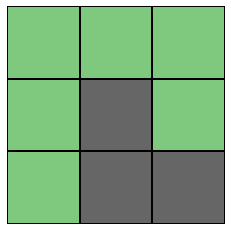

In [46]:
import matplotlib.pyplot as plt 

def plot_maze(maze): 
    ax = plt.gca() # create new figure 
    ax.invert_yaxis() # invert the y-axis to match the matrix
    ax.axis('off') # hide the axis labels 
    ax.set_aspect('equal') # make sure the cells are sqaure
    
    plt.pcolormesh(maze, edgecolors= 'black', linewidth=2, cmap='Accent')
    plt.show()
    
plot_maze(small_maze)

In [47]:
small_maze

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 1.]])

In [48]:
def get_accessible_neighbors(maze:np.ndarray, cell:tuple):
    
    # list of accessible neighbors, initialized to empty
    neighbors= []
    
    x,y = cell
    
    # for each adjacent cell position 
    for i, j in [(x-1,y-1), (x-1,y), (x,y-1), (x-1,y+1), (x, y+1), (x+1,y+1), (x+1, y-1), (x+1, y)]:
      
        # if the adjacent cell within the bounds and the gris is not occupied by a block 
        if i>= 0 and j>= 0 and i<len(maze) and j<len(maze[0]) and maze[(i,j)] == 0:
            neighbors.append(((i,j), 1))
    
    return neighbors
                                                           

In [49]:
get_accessible_neighbors(small_maze,(0,0))

[((0, 1), 1), ((1, 0), 1)]

In [50]:
get_accessible_neighbors(small_maze,(2,0))

[((1, 0), 1)]

In [63]:
def reconstruct_shortest_path(parent:dict, start_cell: tuple, target_cell: tuple):
    
    shortest_path= []
    
    my_parent= target_cell # start from the end (target_cell)
    
    while  my_parent != start_cell:
        
        shortest_path.append(my_parent) # append the parent
        
        my_parent= parent[my_parent] # get the parent of the current parent
        
    shortest_path.append(start_cell) # append the start_cell
    shortest_path.reverse() # reverse the path 
    
    return shortest_path

In [71]:
from typing import Callable 
def bfs_maze_solver(start_cell: tuple, 
                    target_cell: tuple,
                    maze: np.ndarray,
                    get_neighbors: Callable,
                    verbose:bool=False):
    cell_visits = 0 # number of cells that were visited during the search 
    visited = set() # cells that have already been visited 
    to_expand = [] # cells that have to be expanded 
    
    visited.add(start_cell) # add the first cell
    to_expand.append(start_cell)
    
    # remember the shortest distance from the cell to other cells
    shortest_distance = {}
    shortest_distance[start_cell] = 0
    # remember the direct parent of each cell of the other cells 
    parent = {}
    parent[start_cell] = start_cell
    
    while len(to_expand) > 0:
        
        next_cell = to_expand.pop(0) # get the next cell and remove it from the expansion list
        
        if verbose:
            print('\nThe Expanding cell', next_cell)
            
        for neighbor, cost in get_neighbors(maze, next_cell):
           
            if verbose:
                print('\tVisiting neighbor cell', neighbor)
            
            cell_visits+=1
            
            if neighbor not in visited:
                
                visited.add(neighbor)
                to_expand.append(neighbor)
                parent[neighbor]= next_cell
                shortest_distance[neighbor]= shortest_distance[next_cell] + cost
                    
                if neighbor == target_cell:
                    
                    shortest_path = reconstruct_shortest_path(parent, start_cell, target_cell)
                    
                    return shortest_path, shortest_distance[target_cell], cell_visits
            
            else: # the neighbor has been visited before 
                    
                if shortest_distance[neighbor] > shortest_distance[next_cell] + cost:
                        
                    parent[neighbor]= next_cell
                    shortest_distance[neighbor]= shortest_distance[next_cell] + cost
                    
    return None, None, None

In [73]:
start_cell = (2,0)
target_cell = (1,2)

solution, distance, cell_visits = bfs_maze_solver(start_cell, target_cell, small_maze, get_accessible_neighbors, verbose=True)

print('\nShortest Path: ', solution)
print('cells on the shortest Path: ', len(solution))
print('Shortest path Distance: ', distance)
print('The number of cell visited: ', cell_visits)


The Expanding cell (2, 0)
	Visiting neighbor cell (1, 0)

The Expanding cell (1, 0)
	Visiting neighbor cell (0, 0)
	Visiting neighbor cell (0, 1)
	Visiting neighbor cell (2, 0)

The Expanding cell (0, 0)
	Visiting neighbor cell (0, 1)
	Visiting neighbor cell (1, 0)

The Expanding cell (0, 1)
	Visiting neighbor cell (0, 0)
	Visiting neighbor cell (0, 2)
	Visiting neighbor cell (1, 2)

Shortest Path:  [(2, 0), (1, 0), (0, 1), (1, 2)]
cells on the shortest Path:  4
Shortest path Distance:  3
The number of cell visited:  9
